<a href="https://colab.research.google.com/github/yunseoy/VGG16/blob/main/VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

# 폴더 경로 설정
base_path = '/content/drive/My Drive/VGG16'

# 폴더 이름 리스트
folder_names = [
    'Tshirt', 'Dress', 'Jacket', 'Pants', 'Shirt', 'Short', 'Skirt', 'Sweater'
]

# 폴더 생성
for folder_name in folder_names:
    folder_path = os.path.join(base_path, folder_name)
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
        print(f'Folder "{folder_name}" created at {folder_path}')
    else:
        print(f'Folder "{folder_name}" already exists at {folder_path}')


Folder "Tshirt" already exists at /content/drive/My Drive/VGG16/Tshirt
Folder "Dress" created at /content/drive/My Drive/VGG16/Dress
Folder "Jacket" created at /content/drive/My Drive/VGG16/Jacket
Folder "Pants" already exists at /content/drive/My Drive/VGG16/Pants
Folder "Shirt" already exists at /content/drive/My Drive/VGG16/Shirt
Folder "Short" already exists at /content/drive/My Drive/VGG16/Short
Folder "Skirt" already exists at /content/drive/My Drive/VGG16/Skirt
Folder "Sweater" already exists at /content/drive/My Drive/VGG16/Sweater


In [ ]:
import os
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt


In [ ]:
# VGG16 모델 로드
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# VGG16 모델 구조 확인
vgg_model.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 926ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 724ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 879ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 860ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 805ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 866ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 879ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54260 (\N{HANGUL SYLLABLE POL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45908 (\N{HANGUL SYLLABLE DEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


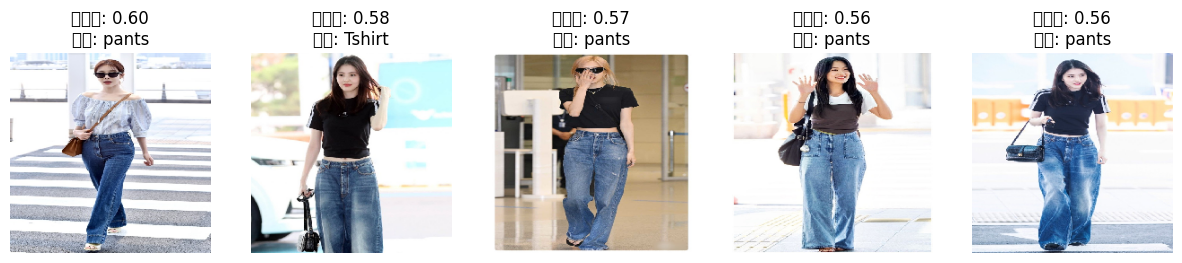

In [ ]:
# VGG16 모델 로드
vgg_model = VGG16(weights='imagenet', include_top=False, pooling='avg')

# 이미지 경로 로드 함수
def load_image_paths_from_folder(folder_path):
    image_paths = [os.path.join(folder_path, fname) for fname in os.listdir(folder_path)
                   if fname.endswith('.jpg') or fname.endswith('.png')]
    return image_paths

# 이미지에서 특징 추출 함수
def extract_features(img_path, model):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    features = model.predict(img_array)
    return features.flatten()

# 코사인 유사도 계산 함수
def cosine_similarity_search(query_features, database_features):
    similarities = cosine_similarity([query_features], database_features)
    similar_indices = similarities.argsort()[0][::-1]
    return similar_indices, similarities

# 데이터베이스 이미지 폴더
database_folders = [
    '/content/drive/MyDrive/VGG16/Tshirt',
    '/content/drive/MyDrive/VGG16/dress',
    '/content/drive/MyDrive/VGG16/jacket',
    '/content/drive/MyDrive/VGG16/pants',
    '/content/drive/MyDrive/VGG16/shirt',
    '/content/drive/MyDrive/VGG16/short',
    '/content/drive/MyDrive/VGG16/skirt',
    '/content/drive/MyDrive/VGG16/sweater'
]

# 모든 폴더에서 이미지 경로 불러오기
image_paths = []
folders = []
for folder in database_folders:
    paths = load_image_paths_from_folder(folder)
    image_paths.extend(paths)
    folders.extend([os.path.basename(folder)] * len(paths))

# 데이터베이스 이미지에서 특징 추출
database_features = [extract_features(img_path, vgg_model) for img_path in image_paths]

# 쿼리 이미지의 특징 추출
query_image = '/content/drive/MyDrive/yolov5/new_clothes/이미지10.jpg'
query_features = extract_features(query_image, vgg_model)

# 유사 이미지 검색
similar_indices, similarities = cosine_similarity_search(query_features, database_features)

# 상위 5개의 유사한 이미지 인덱스 및 유사도 출력
top_5_indices = similar_indices[:5]
print("가장 유사한 이미지 인덱스 (상위 5개):", top_5_indices)
print("유사도 점수 (상위 5개):", similarities[0][top_5_indices])

# 상위 5개의 이미지 시각화
plt.figure(figsize=(15, 5))
for i, idx in enumerate(top_5_indices):
    img_path = image_paths[idx]
    folder_name = folders[idx]
    img = image.load_img(img_path, target_size=(224, 224))
    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.title(f"유사도: {similarities[0][idx]:.2f}\n폴더: {folder_name}")
    plt.axis('off')

plt.show()
